<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# $Z^0$ Two: Over to you! 

We have a theory that a more complicated interaction occurs between a quark, $q$, and an antiquark, $\bar{q}$. We think that they come towards each other, and quickly exchange a particle (the vertical line below). When this happens, the quark and antiquarks turn into $Z^0$s, which then decay themselves, exactly as in the last analysis. Notice that the part of the Feynman diagram within the box is exactly the same as the diagram in Notebook 4!

<CENTER><img src="images/2z4l_boxed.png" style="width:30%"></CENTER>

Does this decay really happen? Let's find out, using some new data. We are going to apply some cuts then see if the plots that we produce still make sense. We are not trying to just confirm what the mass of the $Z^0$ boson is, as we did that above - we just want to see if this kind of decay can happen, and the best way to do that is see if the plots look like what we expect them to look like!

<div class="alert alert-warning">We can't reconstruct the 4-momenta of the quarks, or the exchanged particle - why?</div>


<br>
<details>
    <summary>Answer: </summary>
        Because they decay so quickly, they're gone before the reach the detector, where we can 'see' them. Only the 'final state' leptons live long enough for us to detect them, but luckily we can use conservation of four-momentum to infer the invariant masses of the $Z^0$s from the invariant masses of these pairs of leptons.
</details>

Therefore, we just look at the final state. We are going to work out the masses of both $Z^0$s in these events.

**Contents:** <a name="c"></a>
- [To four leptons](#1.)
- [Real experiments](#2.)
- [Extension exercises/'Do your own project' ideas](#3.)

---

## To four leptons <a name="1."></a>

We have a lot more particles to keep track of this time, so the event will be less clean.

<div class="alert alert-info">Tips:

* You will need to add some cuts: what will these cuts be?
* How do you pick which lepton came from which $Z^0$. Can you tell at all, or do you try each possible way?
* How many ways are there of reconstructing wrongly? How can you tell if you've reconstructed correctly - what else can you cut on?

<br>
Remember, there are two sub-decays here. You could try checking if one of them is a good decay (a real $Z^0$ decaying to two leptons), and then only plotting the mass of the other one if it is.
</div>

### First load your tree and set up your histogram canvas

Import the usual libraries:

In [1]:
import uproot
import numpy as np
from TLorentzVector import TLorentzVector
import hist
from hist import Hist

Open ROOT file, extract the TTree and set up your histogram

- Name: `https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root`
- TTree name: `mini`
- Histogram:
    - name: `"hist_Zl4"`
    - nBins: 30
    - min: 40
    - max: 140
    - label: "Mass (GeV)"

In [ ]:
# Exactly the same as before, using the template in the cell below

f_4l = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root:mini")
f_4l.show()

hist_Zl4 = Hist(hist.axis.Regular(30, 40, 140, name="Mass [GeV]"))####

<details>
    <summary>Answer: </summary>
    
    f_4l = uproot.open('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root:mini')
    
    f_4l.show()
    
    hist_Zl4 = Hist(hist.axis.Regular(30,40,140, label = "Mass (GeV)"))
</details>

Extract the events from the branches we'll need later:
- `"lep_pt"`
- `"lep_eta"`
- `"lep_phi"`
- `"lep_E"`
- `"lep_charge"`
- `"lep_type"`
- `"lep_n"`

In [ ]:
sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

<details>
    <summary>Answer: </summary>
    
    sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])
</details>

### Next, perform your analysis

Note: this exercise will take quite a while to run

In [ ]:
# Declare four TLorentzVectors
firstLepton  = ####
secondLepton = ####
thirdLepton = ####
fourthLepton = ####

sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

# Now, iterate through each event in the tree!
for event in ####:
    # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
    lep_n = event["lep_n"]
    if #### >= 4:
        
        # Cut #2: First two leptons must have opposite charge.
        lep_charge = event["lep_charge"]
        if (lep_charge[0] != ####):
            
            # Cut #3: First two leptons must have same flavour
            lep_type = event["lep_type"]
            if ( lep_type[0] == ####):
                
                lep_pt = event["lep_pt"]
                lep_eta = event["lep_eta"]
                lep_phi = event["lep_phi"]
                lep_E = event["lep_E"]
                
                firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                # Could we add a cut in here? 

                # Now we look at the second decay - note that we have assumed that the first two particles have the indices 0 and 1
                # Cut #4: Second two leptons opposite charge
                if (lep_charge[2] != ####):

                    # Cut #5:
                    if ( lep_type[2] == ####):
                        # By now we should only have particles that look right remaining.
                        
                        # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                        thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                        
                        # Now, reconstruct the Z0 boson Lorentz vector! 
                        Z0_boson1 = #### + ####
                        Z0_boson2 = #### + ####

                        # And chuck this particular value into the histogram.
                        hist_Zl4.fill(Z0_boson1.M())
                        hist_Zl4.fill(Z0_boson2.M())

<div class="alert alert-info">Some hints to help you - Click the hints to reveal.</div>

<details>
    <summary>a) Declare four TLorentzVectors. </summary>

    firstLepton  = TLorentzVector()
    secondLepton = TLorentzVector()
    thirdLepton  = TLorentzVector()
    fourthLepton = TLorentzVector()
</details>

<details>
    <summary> b) Now, iterate through each event in the tree </summary>
    
    for event in sel_events:
    
</details>

<details>
    <summary>c) Cut #1: At least 4 leptons in the event. </summary>
    
    if lep_n >= 4:
</details>

<details>
    <summary>d) Cut #2: First two leptons must have opposite charge. </summary>
    
    if (lep_charge[0] != lep_charge[1]):
</details>

<details>
    <summary>e) Cut #3: First two leptons must have same flavour. </summary>
    
    if ( lep_type[0] == lep_type[1]):
</details>

<details>
    <summary>f) Cut #4 and Cut #5: Second two leptons opposite charge, same flavour. </summary>
    
    if (lep_charge[2] != lep_charge[3]):
    if (lep_type[2] == lep_type[3]):
</details>

<details>
    <summary>g) Now, reconstruct the Z0 boson Lorentz vectors. </summary>
    
    Z0_boson1 = firstLepton + secondLepton
    Z0_boson2 = thirdLepton + fourthLepton
</details>

<details>
    <summary> --> If you're REALLY stuck... the full solution: </summary>

    #Declare four TLorentzVectors
    firstLepton  = TLorentzVector()
    secondLepton = TLorentzVector()
    thirdLepton = TLorentzVector()
    fourthLepton = TLorentzVector()

    sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

    #Now, iterate through each event in the tree!
    for event in sel_events:
        # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
        lep_n = event["lep_n"]
        if lep_n >= 4:
            
            # Cut #2: First two leptons must have opposite charge.
            lep_charge = event["lep_charge"]
            if (lep_charge[0] != lep_charge[1]):
                
                # Cut #3: First two leptons must have same flavour
                lep_type = event["lep_type"]
                if ( lep_type[0] == lep_type[1]):
                    
                    lep_pt = event["lep_pt"]
                    lep_eta = event["lep_eta"]
                    lep_phi = event["lep_phi"]
                    lep_E = event["lep_E"]
                    
                    firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                    secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                    
                    # Could we add a cut in here? 
    
                    # Now we look at the second decay - note that we have assumed that the first two
                    # Cut #4: Second two leptons opposite charge
                    if (lep_charge[2] != lep_charge[3]):
    
                        # Cut #5:
                        if ( lep_type[2] == lep_type[3]):
                            # By now we should only have paricles that look right remaining.
                            
                            # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                            thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                            fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                            
                            # Now, reconstruct the Z0 boson Lorentz vector! 
                            Z0_boson1 = firstLepton + secondLepton
                            Z0_boson2 = thirdLepton + fourthLepton
    
                            # And chuck this particular value into the histogram.
                            hist_Zl4.fill(Z0_boson1.M())
                            hist_Zl4.fill(Z0_boson2.M())
       
</details>

### Finally, plot your results

In [ ]:
hist_Zl4.plot(histtype = "fill")
plt.show()

[Return to contents](#c)

---

# Real experiments <a name="2."></a>

Now, real experiments are not run like this. You may have noticed that although we mentioned a theoretical decay, all we gave you was a diagram. You had no real way of checking whether or not the decay that the theory described is actually what happens in reality, other than saying that the plots look roughly about right.

So, one more thing. Surprise! The data you have been analysing here isn't really data at all - it is in fact a simulated sample of $Z^0 \rightarrow \ell\bar{\ell}$ and $Z^0 Z^0 \rightarrow \ell\bar{\ell}\ell\bar{\ell}$ decays in the ATLAS detector, based on the Standard Model.

The way we perform actual experiments, is that we write some analysis code, just like above, and then run the exact same code on a Standard Model simulation and on the real data that gets spat out by the detector. The extent to which the two agree then tells us how close our model is to reality.

Here’s an example of what happens if we compare the simulation with what we see at the LHC. The black dots are the real data, and the bars are real data. You may notice that it looks pretty close to what we had before - that's because there are lots and lots of Z decays that happen in the detector. If you looked closely enough, you would be able to tell that there are other colours stacked there in the histogram, but the slices are so thin that you can't see them.

<CENTER><img src="images/Zinvmass-ATLASOD8TeV.png" style="width:50%"></CENTER>

[Return to contents](#c)

---

## Optional extra exercises / 'Do your own project' ideas  <a name="3."></a>

<div class="alert alert-info"> When completing these execises, it is recommended to copy/paste any code you're reusing from above into new cells, to keep the example available for reference.
<br>
    
New cells can be added above using `esc` + `a`, below using `esc` + `b`, or using the `Insert` tab at the top of the page.</div> 

a) The way we performed our 4 lepton analysis was not optimal - we ended up selecting many fewer events than actually happened.

- What was the problem with our analysis? 

- Can you think of a better way? Redo the analysis your way and compare the results

<details>
    <summary>Click for a hint: </summary>
    In our version of the analysis we only kept an event if its first two leptons looked like one Z-boson, and its second two leptons looked like another. Is this the only combination we could have chosen?
</details>

b) An example of a file with real data events containing four leptons is `"https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root` (with more available in that folder).

- Choose one of the analyses above ($Z\rightarrow ll$ or $ZZ\rightarrow llll$) and repeat using real data instead of simulation
- Do your plots look the same?

c) To perform our analysis, we imposed some basic cuts to try select good Z boson candidates, however, in practice real measurements impose more! 

- Look at the branches available in your TTrees, and their explanation in the [ATLAS Open Data Documentation](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html) to try come up with some more cuts.
- Repeat the analysis and compare your plots:
    - How are they different?
    - Which one would be considered a 'better measurement' and why?

In [2]:
f_4lep = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini")
f_4lep.show()
#There are also the following data files you can also run over to increase your data sample
#https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_B.4lep.root
#https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_C.4lep.root
#https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_D.4lep.root


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
channelNumber        | int32_t                  | AsDtype('>i4')
mcWeight             | float                    | AsDtype('>f4')
scaleFactor_PILEUP   | float                    | AsDtype('>f4')
scaleFactor_ELE      | float                    | AsDtype('>f4')
scaleFactor_MUON     | float                    | AsDtype('>f4')
scaleFactor_PHOTON   | float                    | AsDtype('>f4')
scaleFactor_TAU      | float                    | AsDtype('>f4')
scaleFactor_BTAG     | float                    | AsDtype('>f4')
scaleFactor_LepTR... | float                    | AsDtype('>f4')
scaleFactor_Photo... | float                    | AsDtype('>f4')
trigE                | bool                     | AsDtype(

In [3]:
# Example. Let's look at the pt distribution of the first lepton of each event
hist_pt1 = Hist(hist.axis.Regular(30, 0, 150, name="pT [GeV/c]"))


In [4]:
sel_events = f_4lep.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])
print('Number of events in the file is: {}'.format(len(sel_events)))

Number of events in the file is: 39


In [5]:
sel_events = f_4lep.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

#Set up a counter when iteratring over events
counter = 0
outputEvery = 10

# Now, iterate through each event in the tree!
for event in sel_events:

    if ((counter % outputEvery) == 0):
        print('Iteration reached event number is {}'.format(counter))
    
    # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
    lep_n = event["lep_n"]
    if lep_n >= 4:
        lepton_pt = event["lep_pt"]
        hist_pt1.fill(lepton_pt[0]/1000.0) 
        counter+=1



Iteration reached event number is 0
Iteration reached event number is 10
Iteration reached event number is 20
Iteration reached event number is 30


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe626448810>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

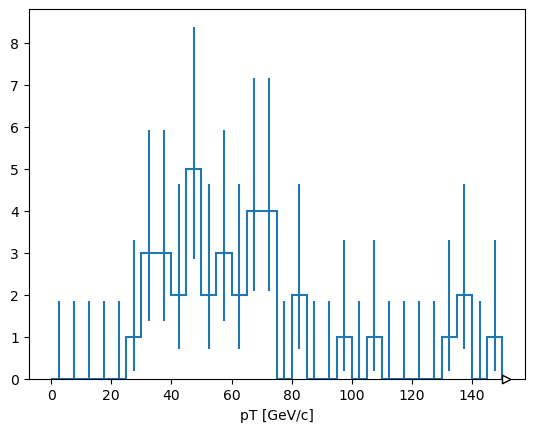

In [6]:
hist_pt1.plot()

[Return to contents](#c)

---

<div class="alert alert-success">

__Congratulations!__ You're really approaching your $Z^0$ boson research like a true scientist now! Bored of the $Z^0$? Come meet the Higgs in Notebook 6.
    
</div>